In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
from google.colab import files

# Upload the file if it's not already uploaded
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {'all_data.csv'}")

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_name)

# Now you can work with the DataFrame
print(df.head())


Saving all_data.csv to all_data (2).csv
Uploaded file: all_data.csv
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [24]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [25]:
df.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

In [26]:
df = df.rename(columns={'Life expectancy at birth (years)': 'Life_expectancy'})
print(df.head())


  Country  Year  Life_expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


In [27]:
unique_countries = df['Country'].unique()
unique_years = df['Year'].unique()

print("Unique Countries:", unique_countries)
print("Unique Years:", unique_years)


Unique Countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Unique Years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Above result shows that we are going to analize the GDP and Life expectancy data from 6 countries between the year 2000 and 2015.

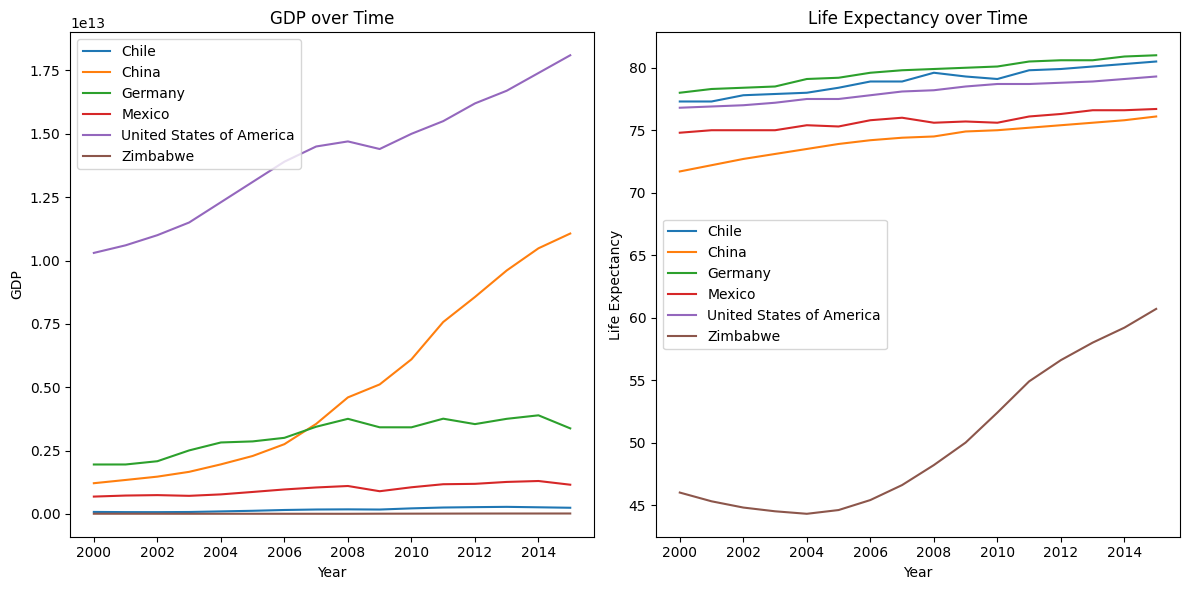

In [28]:

plt.figure(figsize=(12, 6))

# Line plot for GDP
plt.subplot(1, 2, 1)
for country in unique_countries:
  df_country = df[df['Country'] == country]
  plt.plot(df_country['Year'], df_country['GDP'], label=country)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP over Time')
plt.legend()

# Line plot for Life Expectancy
plt.subplot(1, 2, 2)
for country in unique_countries:
  df_country = df[df['Country'] == country]
  plt.plot(df_country['Year'], df_country['Life_expectancy'], label=country)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy over Time')
plt.legend()

plt.tight_layout()
plt.show()


Analysis for GDP:

We can see that the GDP of USA has been relatively higher than other countries throughout the years. However, when it comes to growth rate, China has been growing faster. While the GDP of Mexico and Zimbabwe appears to be stagnant, Germany has declined recently. For Chile, the GDP is growing steadily over the years. The interesting finding in this graph is the year 2008. As we see the GDP in most countries such as USA, Germany, and Mexico has noticeably declined, Chinese GDP followed the reverse pattern. Is it because the country itself is the biggest exporter in the world? How did they overcome global financial crisis?

Analysis for Life expectancy:

It is clear that Zimbabwe life expectancy is significantly lower than other countries. In 2004 life expectancy in Zimbabwe was almost as half as the highest life expectancy country - Germany. Since then this country has made the progress and jumped to 60 by the year 2015, increasing the life expectancy by around 15 years. Among these countries, Germany has the highest life expectancy. Whereas Chile and Mexico have slightly unstable pattern, other countries, in general, have a steady growth rate over the years

The next quesion we can ask is whether GDP and life expectancy corelated to each other.

Correlation between GDP and Life Expectancy: 0.3432067484491559


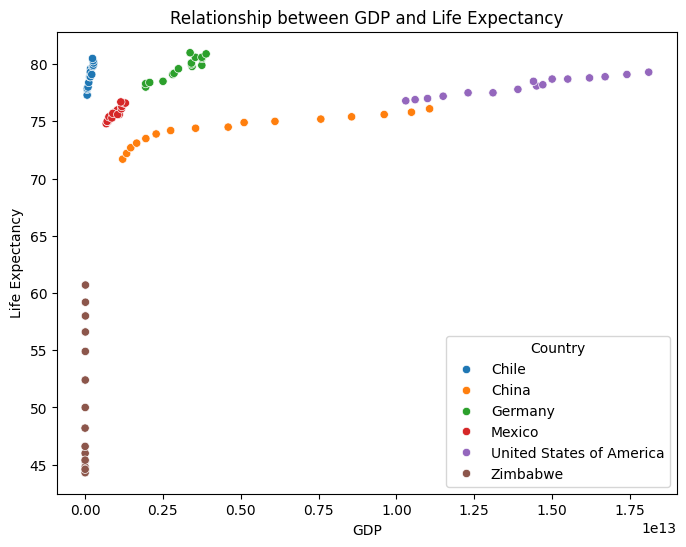

In [46]:
# Calculate the correlation between GDP and Life Expectancy
correlation = df['GDP'].corr(df['Life_expectancy'])
print(f"Correlation between GDP and Life Expectancy: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP', y='Life_expectancy', data=df, hue='Country')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Relationship between GDP and Life Expectancy')
plt.legend(title='Country')
plt.show()

Analysis:

 The correlation coefficient indicates a moderate positive correlation
 between GDP and Life Expectancy. This suggests that as GDP generally
 increases, life expectancy also tends to increase. However, the correlation
 is not extremely high, indicating that other factors may also influence
 life expectancy.

Definitely, the graph looks odd. Maybe we need to modify our data to illustrate more interpretable plot

In [47]:
# prompt: find growth rate of GDP for each country

# Group data by country and calculate the growth rate of GDP
growth_rates = df.groupby('Country')['GDP'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)
growth_rates_life_ex= df.groupby('Country')['Life_expectancy'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

print("GDP Growth Rate for Each Country:\n", growth_rates)
print("Life Expectancy Growth Rate for Each Country:\n", growth_rates_life_ex)


GDP Growth Rate for Each Country:
 Country
Chile                       211.475850
China                       813.418913
Germany                      73.112644
Mexico                       68.545801
United States of America     75.728155
Zimbabwe                    143.718552
Name: GDP, dtype: float64
Life Expectancy Growth Rate for Each Country:
 Country
Chile                        4.139715
China                        6.136681
Germany                      3.846154
Mexico                       2.540107
United States of America     3.255208
Zimbabwe                    31.956522
Name: Life_expectancy, dtype: float64


In [48]:
# prompt: combine growth_rates_life_ex and growth_rates into one dataframe with corresponding country names

# Create a DataFrame from the growth rates series
growth_df = pd.DataFrame({'Country': growth_rates.index, 'GDP_Growth_Rate': growth_rates, 'Life_Expectancy_Growth_Rate': growth_rates_life_ex})

print(growth_df)


                                           Country  GDP_Growth_Rate  \
Country                                                               
Chile                                        Chile       211.475850   
China                                        China       813.418913   
Germany                                    Germany        73.112644   
Mexico                                      Mexico        68.545801   
United States of America  United States of America        75.728155   
Zimbabwe                                  Zimbabwe       143.718552   

                          Life_Expectancy_Growth_Rate  
Country                                                
Chile                                        4.139715  
China                                        6.136681  
Germany                                      3.846154  
Mexico                                       2.540107  
United States of America                     3.255208  
Zimbabwe                               

In [49]:
# prompt: drop the index in growth_df

growth_df = growth_df.reset_index(drop=True)
print(growth_df)


                    Country  GDP_Growth_Rate  Life_Expectancy_Growth_Rate
0                     Chile       211.475850                     4.139715
1                     China       813.418913                     6.136681
2                   Germany        73.112644                     3.846154
3                    Mexico        68.545801                     2.540107
4  United States of America        75.728155                     3.255208
5                  Zimbabwe       143.718552                    31.956522


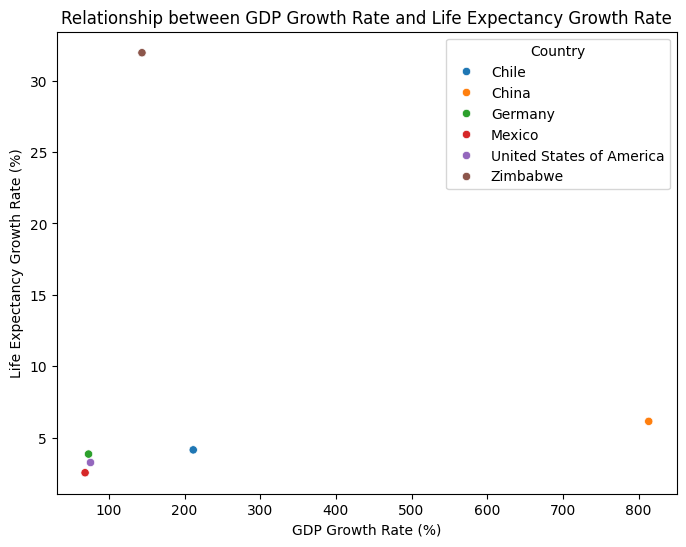

In [50]:
# prompt: create scatter plot using growth_df

plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP_Growth_Rate', y='Life_Expectancy_Growth_Rate', data=growth_df, hue='Country')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Life Expectancy Growth Rate (%)')
plt.title('Relationship between GDP Growth Rate and Life Expectancy Growth Rate')
plt.legend(title='Country')
plt.show()


Here we can see the outliers - China and Zimbabwe. Whereas China made huge progress in GDP, Zimbabwe could increase the life expectancy rate significantly. But Chinese life expectancy has not increased as much as Zimbabwe. Therefore we can conclude that GDP has somewhat correlation with life expectancy, though there must be other factors which have impact on life expectancy. Since we have only two variables we can further make regression analysis to see at which degree GDP can affect life expectancy.

In [12]:
# prompt: find average GDP and Life expectancy for each country

# Group data by country and calculate the average GDP and Life Expectancy
average_gdp_life_expectancy = df.groupby('Country').agg({'GDP': 'mean', 'Life_expectancy': 'mean'})

print(average_gdp_life_expectancy)


                                   GDP  Life_expectancy
Country                                                
Chile                     1.697888e+11         78.94375
China                     4.957714e+12         74.26250
Germany                   3.094776e+12         79.65625
Mexico                    9.766506e+11         75.71875
United States of America  1.407500e+13         78.06250
Zimbabwe                  9.062580e+09         50.09375


Mean Squared Error: 90.91789807110622
R-squared: 0.1341902933069017
Intercept: 70.1143611671244
Coefficient: 7.525248479033797e-13


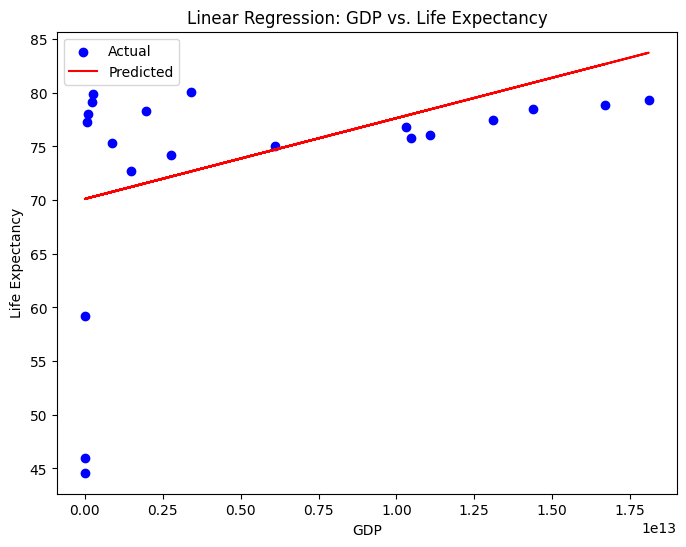

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df[['GDP']]  # Independent variable (GDP)
y = df['Life_expectancy']  # Dependent variable (Life Expectancy)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Linear Regression: GDP vs. Life Expectancy')
plt.legend()
plt.show()

We see that MSE is 90.9 which is quite large. It means our data is dispersed widely from the central - mean, thus the model accuracy is in doubt. And we also see that r-squared measure is only 0.13 which means Life expectancy is 13% dependent to GDP value. Because the coefficient is extremely small, it suggests that changes in GDP have a negligible effect on Life expectancy, meaning the line is almost horizontal.

All in all, main findings are concluded below:

- GDP is positively correlated with life expectancy, but the relationship is not strong.
- Other factors beyond GDP are important determinants of life expectancy.
- More research is needed to fully understand the complex relationship between these variables.

